# DA Mini Project

* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.

이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 1 요구사항 분석

**목표**   
서비스 구독 결정 예측을 위해, 유저들의 학습 습관 (패턴), 선호도 (콘텐츠에 대한 반응, 만족도), 이용 행태 (서비스 이용 빈도와 시간) 등 다양한 측면을 면밀히 분석    
&rarr; <span style="color:red">*어떤 요소들이 구독 결정에 영향을 미치는가? 어떻게 서비스 구독 사용자를 증가시킬까?*</span>

# 2 데이터 살펴보기
가설 세우기 전 힌트를 얻을만한 정보가 있는지 데이터 살펴보기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_ori = pd.read_csv('./data/mini.csv')

In [3]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
df_ori.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


- 수치형 데이터
  - 이산형 데이터: 'subscription_duration', 'recent_login_time', 'monthly_active_learning_days', 'total_completed_courses', 'abandoned_learning_sessions', 'customer_inquiry_history'
  - 연속형 데이터: 'average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement'
- 범주형 데이터
  - 순서형 데이터: 'community_engagement_level', 'preferred_difficulty_level'
  - 명목형 데이터: 'subscription_type', 'payment_pattern', 'target'

In [5]:
# 수치형 데이터
discrete_list = ['subscription_duration', 'recent_login_time', 'monthly_active_learning_days', 'total_completed_courses', 
                 'abandoned_learning_sessions', 'customer_inquiry_history']
continuous_list = ['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']
# 범주형 데이터
ordinal_list = ['community_engagement_level','preferred_difficulty_level']
norminal_list = ['subscription_type', 'payment_pattern', 'target']

In [6]:
df_ori.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


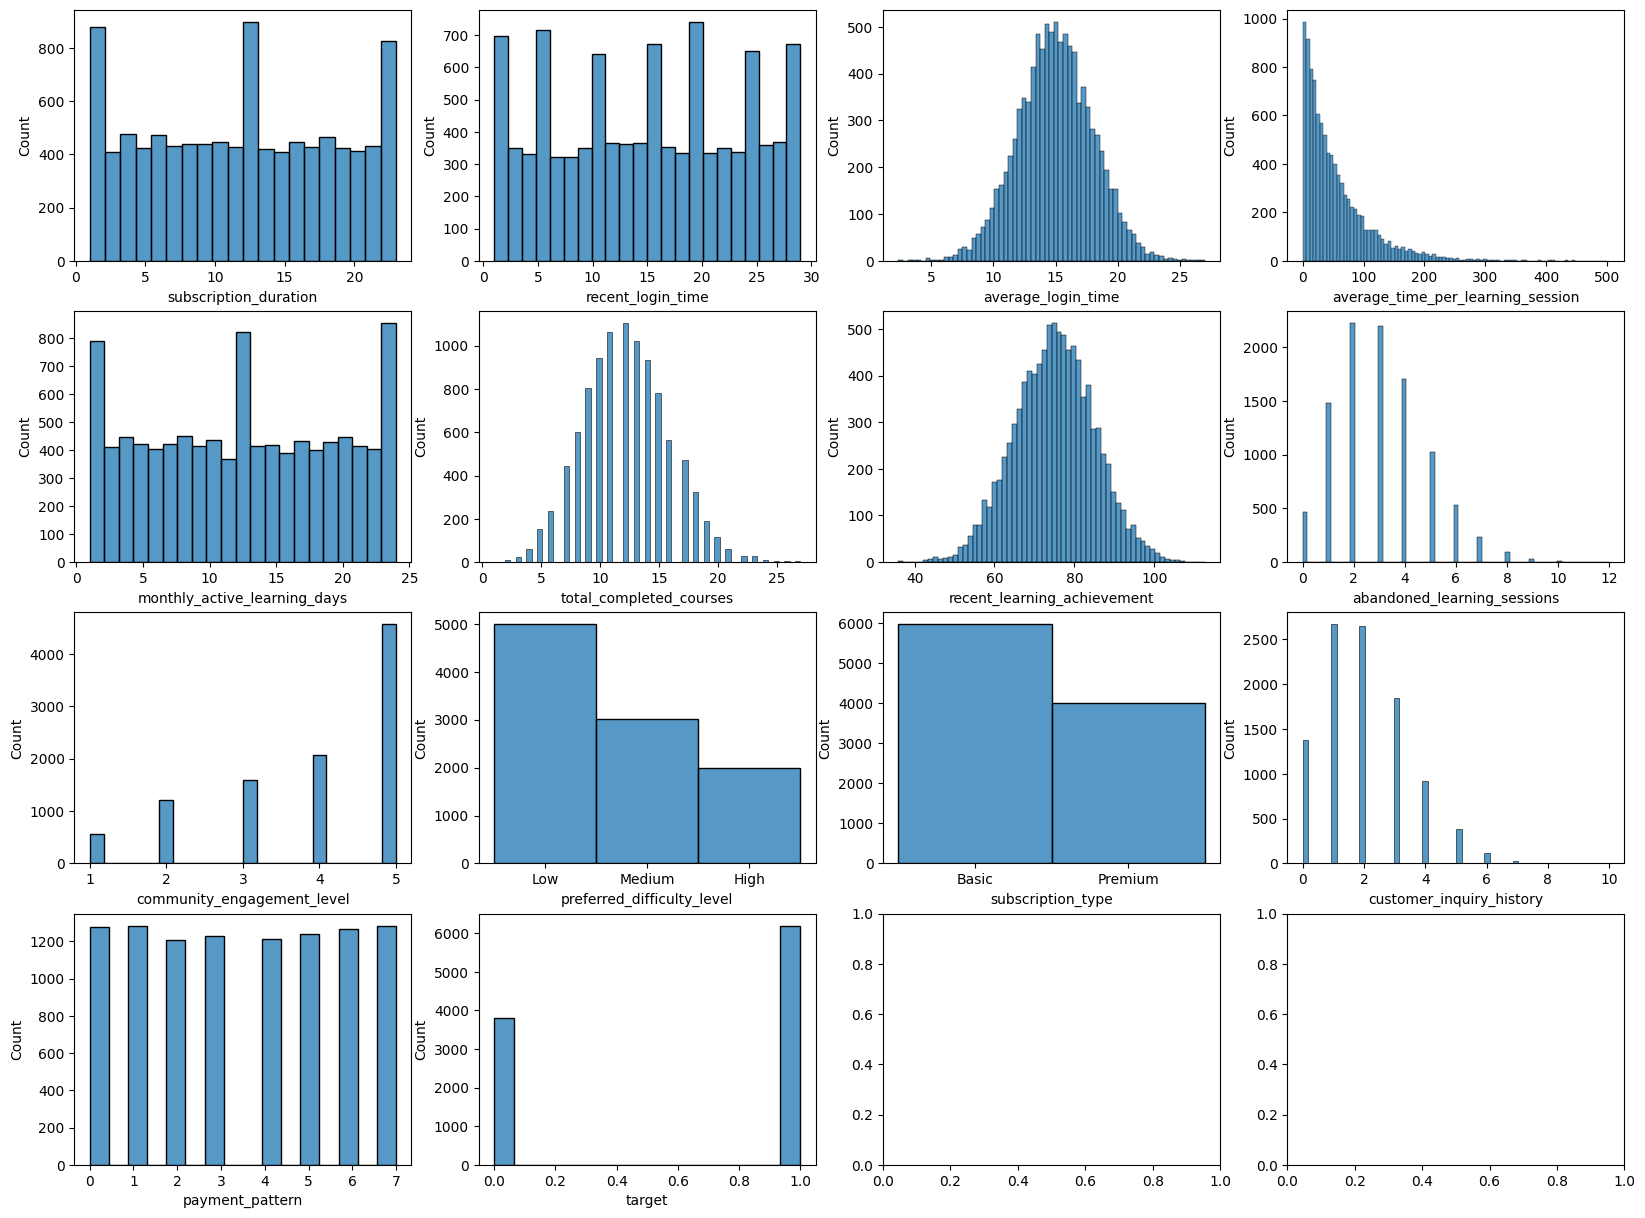

In [167]:
num_col = len(df_ori.columns) - 1

# num_col
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.ravel()

for i in range(num_col):
    axes[i] = sns.histplot(data=df_ori, x=df_ori.columns[i+1], ax=axes[i])

## 2.1 의미가 모호한 요소들 정의하기
의미가 모호한 데이터의 경우, 온라인 학습 플랫폼 도메인과 데이터의 타입 등을 고려하여 좀 더 명확하게 정의

* subscription_duration: 사용자가 서비스에 가입한 기간 (월)
  - 데이터를 살펴보다보면 'subscription_duration'과 'payment_pattern'이 잘 매칭되지 않는 부분이 있음 &rarr; 2.1.1에서 살펴보기 </br></br>
  
* recent_login_time: 사용자가 마지막으로 로그인한 시간 (일) &rarr; *<span style="color:red">사용자가 마지막으로 로그인한 일자 (혹은 마지막 로그인 후 경과된 일수)</span>* </br>

* average_login_time:  사용자의 일반적인 로그인 시간 &rarr; *<span style="color:red"> 평균 로그인 일수 </span>* </br>

* average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
  - 세션의 의미
    - 방문자가 웹 서버에 접속해있는 상태를 하나의 단위로 보는 세션?
    - 코스 내에서 특정 기간 동안 진행되는 하위 단위(강의, 토론 등)?
  - <span style="color:red"> 온라인 학습 플랫폼 도메인과, 아래에서 '코스'라는 단어 사용을 고려하여 후자의 의미로 사용된 것으로 판단</span> </br></br>
  
* monthly_active_learning_days: 월간 활동적인 학습 일수 </br>

* total_completed_courses: 완료한 총 코스 수
  - 코스: 전체 교육 프로그램이나 주제에 대한 큰 단위를 나타냄
  - 코스와 세션의 관계: 하나의 코스 안에 여러 세션이 포함될 수 있음
  - 예시: "컴퓨터 과학 코스"는 전체적인 교육 프로그램이고, "데이터베이스 설계 세션"은 그 코스 안에서 특정 주제나 기간 동안 진행되는 하위 단위를 나타냅니다. 세션은 코스를 더 작은 단위로 나누어 학습을 조직하고 구성하는 데 사용됩니다. </br></br>
 
* recent_learning_achievement: 최근 학습 성취도
  - 일반적으로 '학습 성취도' 라고 하면, 최대 100%를 생각할 수 있음
  - 데이터 내에서는 100 이상의 값을 가지는 경우도 존재 (58개) &rarr; 해당 온라인 플랫폼만의 '학습 성취도 계산법'이 있거나, 계산 시스템 오류로 인한 이상치일 수 있음
  - *<span style="color:red">학습 성취도의 계산법을 알아내는 것이 목표가 아니므로, 둘 중 어떤 것이든 크게 영향을 미치지 않음</span>* </br></br>

* abandoned_learning_sessions: 중단된 학습 세션 수 </br>

* community_engagement_level: 커뮤니티 참여도 &rarr; Level 1~5 </br>

* preferred_difficulty_level: 선호하는 난이도 &rarr; Low / Medium / High </br>

* subscription_type: 구독 유형 &rarr; Basic / Premium </br>

* customer_inquiry_history: 고객 문의 이력 </br>

* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
  - 7: 3개월 모두 결제함
  - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
  - 5: 첫 달과 마지막 달에 결제함
  - 4: 첫 달에만 결제함
  - 3: 마지막 2개월에 결제함
  - 2: 가운데 달에만 결제함
  - 1: 마지막 달에만 결제함
  - 0: 3개월 동안 결제하지 않음
  </br></br>
* target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

### 2.1.1 'subscription_duration'과 'payment_pattern'의 관계

- 데이터를 살펴보니, 'subscription_duration' (서비스 가입 기간)이 1인데 'payment_pattern'이 1 (마지막 달만 결제)가 아닌 데이터들도 존재
- <span style="color:red"> 즉, 가입 이전에도 결제 내역이 존재함 </span>

&rarr; 'subscription_duration'과 'payment'는 별개의 개념이라고 볼 수 있을 것이다.     
&rarr; 'payment_pattern에' 따른 'subscription_duration' <span style="color:red">분포 확인</span>

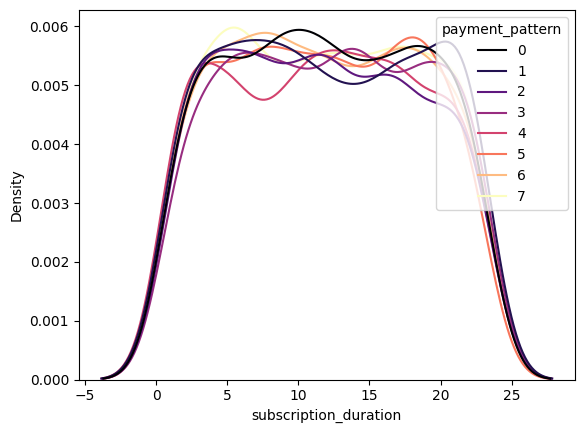

In [87]:
# 'payment_pattern'에 따른 'subscription_duration' 분포 확인
g = sns.kdeplot(data=df_ori, x=df_ori['subscription_duration'], hue='payment_pattern', palette="magma")
sns.move_legend(g, "upper right")
plt.show()

분포를 살펴봤을 때, 어떤 패턴이 발견되지 않음 &rarr; 'subscription_duration'과 'payment_pattern'는 서로 무관하다.    
그렇다면, 'subscription_duration' 을 어떻게 해석할 수 있을까?

1) 사용자는 서비스를 가입하지 않아도 (비회원으로도) 코스를 개별 구매할 수 있다.
   - 단, 구독 (subscription)을 위해서는 서비스를 가입해야만 한다. (서점 사이트를 생각했을 때, 책을 비회원 or 회원으로 1회성 구매를 하거나, 회원 가입을 통해 구독료를 내고 구독서비를 이용하는 경우와 유사)
   - &rarr; 여기서 말하는 'payment'는 1회성 구매 or 구독 서비스 결제를 포함한다고 할 수 있음<br/><br/>

2) "subscription_duration: 사용자가 서비스에 가입한 기간 (월)" 의 설명은, '서비스에 가입한 개월 수'가 아닌 '월' 기준으로 경과된 시간 (일자)을 의미한다.
   - 즉, 'subscription_duration'은 (결제 여부와 상관 없이) 해당 월의 결제 예정일로부터 지난 일수이다. (결제 예정일=매달 15일, 데이터 수집일: 그달의 29일 &rarr; 'subscription_duration'=14)<br/><br/> 

3) subscription_duration은 '월' 기준으로 구독이 유효한 기간을 의미한다.
   - 영문 계약서 샘플을 놓아놓은 사이트 (law insider)에서 subscription duration이 어떤 의미로 사용되는지 검색
   - "Subscription Duration means the period of time during which a subscription remains in effect for a user of a particular service, under the same terms and conditions."

------
각 두 가지의 경우, 아래 데이터들은 어떻게 해석할 수 있을까?

In [148]:
# subscription_duration이 2인 경우도 살펴볼 수 있지만, 우선 subscription_duration = 1인 데이터들을 살펴보자
df_ori[(df_ori['subscription_duration']==1) & (df_ori["payment_pattern"] != 1)][['recent_login_time', 'monthly_active_learning_days', 'total_completed_courses', 'subscription_type', 'payment_pattern', 'target']]

,recent_login_time,monthly_active_learning_days,total_completed_courses,subscription_type,payment_pattern,target
3,19,19,18,Basic,0,1
39,14,14,11,Basic,5,1
49,14,19,12,Basic,4,0
50,16,10,7,Basic,0,1
71,29,6,12,Premium,5,1
...,...,...,...,...,...,...
9851,15,7,10,Basic,6,1
9864,27,19,12,Basic,5,0
9884,23,7,13,Basic,4,1
9885,24,5,11,Premium,7,1


**index=39인 데이터**
- subscription_duration = 1, payment_pattern = 5 (첫 달과 마지막 달에 결제함)
  1. 첫 달엔 1회성으로 courses를 구매하고, 마지막 달에는 구독 결제를 진행 함
  2. 데이터 수집일이 해당 월의 31일이라고 하면, 30일이 결제 예정이고, 저번 달은 구독을 건너 뛰고 저저번달과 이번 달은 구독 결제를 진행
  3. 데이터 수집일 기준으로, 구독 유효기간이 1일 남은 상태이고 (즉, 다음 날 결제 예정일), 저번 달은 구독을 건너 뛰고 저저번달과 이번 달은 구독 결제를 진행 </br></br>
  
**index=49인 데이터**
- subscription_duration = 1, payment_pattern = 4 (첫 달에만 결제함)
  1. 저저번 달에 1회성으로 courses를 구매하고, 저번 달은 1회성 구매 조차 하지 않음, 이번 달에 서비스를 가입했지만 아직 결제는 하지 않음
  2. 저저번 달에는 결제 예정일에 결제를 했지만, 저번 달과 이번 달은 결제 예정일에 결제를 하지 않음    
  3. 데이터 수집일 기준으로, 구독 유효기간이 14일 남은 상태이고, 저번 달과 이번 달은 결제 예정일에 결제를 하지 않음</br></br>

위와 같이 해석할 수 있다.  </br>
하지만 현재 분석 프로젝트에서는 둘 중 어느게 더 정확한 해석인지 알아낼 수 없고, 그것을 알아내는 것이 목표는 아니므로, "이런 식으로 해석될 수 있다" 정도로 생각.    
우선 해당 단계에서는 <span style="color:red">subscription_duration과 payment_pattern과의 상관관계는 딱히 없다는 것으로 결론</span>짓고, 추후에 분석을 하면서 단서를 발견하면 그 때 다시 정의하는 것으로 하자.    

### 2.1.2 결론
정의가 명확하지 않은 요소들은 담당자에게 물어보고 확인이 필요하다.

In [93]:
# 데이터 유형에 따라 상관 계수와 p-value를 구하는 함수 정의
from scipy import stats
from scipy.stats import chi2_contingency

def p_value_check(p):
    if p < 0.05:
        print(f'p-value = {p}로 귀무가설을 기각합니다.')
        return True
    else:
        print(f'p-value > 0.05 이므로 귀무가설을 채택합니다.')
        return False

def corr_p_value(x_type, y_type, x, y):
    # Point biserial correlation (점이연 상관계수) *출처: https://dohwan.tistory.com/394
    if (x_type == 'cont') and (y_type == 'bin_cat'):
        corr, p_value = stats.pointbiserialr(x, y)
        if p_value_check(p_value):
            print('correlation: ', corr)

    # Cramer's V
    elif (x_type == 'cat') and (y_type == 'cat'):
        contingency_table = pd.crosstab(x,  y)
        chi2, _, _, _ = chi2_contingency(contingency_table)

        # Cramer's V 계산
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v_value = (phi2 / min((k-1), (r-1)))**0.5
    
        # 상관 계수의 p-value 계산
        p_value = chi2_contingency(contingency_table)[1]
        if p_value_check(p_value):
            print('correlation: ', cramers_v_value)

    # elif (x_type == 'cat') and (y_type == 'cat')

# =======================================================
# Point biserial correlation (점이연 상관계수) *출처: https://dohwan.tistory.com/394
# 연속형 데이터 - 이산 범주형 데이터
def cont_cat(x, y):
    '''
    Args:
    - x: 연속형 데이터
    - y: 이산 범주형 데이터
    '''
    corr, p_value = stats.pointbiserialr(x, y)
    print('correlation: ', corr)
    print('p_value: ', p_value)
    return corr, p_value
# =======================================================
# Cramer's V
# 범주형 데이터 - 범주형 데이터 
def cat_cat(x, y):
    contingency_table = pd.crosstab(x,  y)
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Cramer's V 계산
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v_value = (phi2 / min((k-1), (r-1)))**0.5

    # 상관 계수의 p-value 계산
    p_value = chi2_contingency(contingency_table)[1]
    
    print("Cramér's V:", cramers_v_value)
    print("P-value:", p_value)
    return cramers_v_value, p_value
# =======================================================
# 이산형-범주형
def disc_cat(x, y):
    contingency_table = pd.crosstab(x,  y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    num_categories = min(len(x.unique()), len(y.unique()))
    cramers_v_value = np.sqrt(chi2 / (100 * (num_categories - 1)))

    # p-value 계산
    dof = (len(x.unique()) - 1) * (len(y.unique()) - 1)
    p_value = 1 - stats.chi2.cdf(chi2, dof)

    print("Cramér's V:", cramers_v_value)
    print("P-value:", p_value)
    
    return cramers_v_value, p_value
# =======================================================

## 2.2 target과 상관 관계가 있는 요소 찾기

In [17]:
df = df_ori.iloc[:, 1:] # user_id 정보 제거
df_ = df.copy() 

# 명목형 데이터들의 datatype을 str에서 int로 변환
df_['preferred_difficulty_level'] = df_['preferred_difficulty_level'].replace({'Low':0, 'Medium':1, 'High':2})
df_['subscription_type'] = df_['subscription_type'].replace({'Basic':0, 'Premium':1})

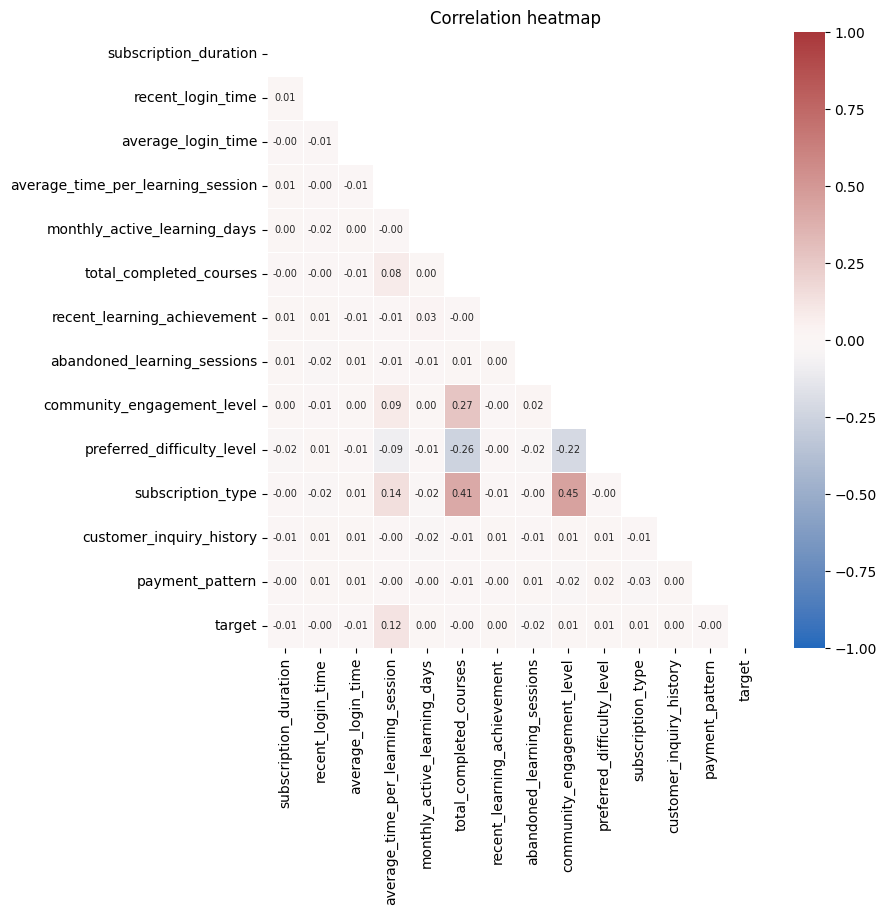

In [18]:
plt.figure(figsize=(8, 8))

upp_mat = np.triu(df_.corr()) # 위 대각 삼각형 삭제
sns.heatmap(df_.corr(), vmin=-1, vmax=1, mask=upp_mat, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 7}, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Correlation heatmap")
plt.show()

In [177]:
# g = sns.PairGrid(df_[['average_time_per_learning_session', 'monthly_active_learning_days', 'total_completed_courses', 'target']], hue='target')
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

target과 'average_time_per_learning_session'이 약한 상관관계를 보인다.    
해당 상관계수가 유의미한지 확인하기 위해서 p-value를 계산한다. 
- 귀무 가설: 'average_time_per_learning_session'은 'target'과 상관 관계가 없다.
- 'average_time_per_learning_session'은 연속형 데이터, target은 이산 범주형 데이터    
&rarr; Point biserial correlation (점이연 상관계수)

In [20]:
corr, p_value = cont_cat(df_['average_time_per_learning_session'], df_['target'])

if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')

correlation:  0.11826094698742995
p_value:  1.771790718130997e-32
p-value는 1.771790718130997e-32로, 귀무 가설을 기각합니다.


### 2.2.1 결론

p-value가 0.05보다 작으므로, 대립가설 ('average_time_per_learning_session'은 'target'과 상관 관계가 있다.)을 채택    
&rarr; 다만 상관 계수가 크지는 않으므로, <span style="color:red">약한 상관 관계</span>를 가진다고 판단할 수 있다.   
- target (구독 결정 여부)에 직접적인 영향을 끼치는 것은 'average_time_per_learning_session'이다.
- 하지만 위 상관 분석에서 target과 직접적인 상관 관계는 없지만, 요소들간의 상관 관계가 존재하는 케이스가 있음을 확인했다. &rarr; <span style="color:red">간접적인 영향을 미치는지도 확인해야 한다.</span>


# 3 가설 설정

일반적으로 구독을 하지 않은 사람들보다 구독을 한 사람들에게 더욱 다양한 학습 세션을 제공할 것이다.   
&rarr; 다양한 학습 세션 중 좀 더 많은 정보를 제공하는 즉, 학습 시간이 긴 세션도 포함될 것이다.     
</br>
따라서, 
***<span style="color:red">average_time_per_learning_session이 길어질 수록 구독을 할 의향이 높을 것이다</span>***

# 4 데이터 분석

## 4.1 average_time_per_learning_session과 구독 결정 여부의 관계

### 4.1.1 정량적 분석
- target=0 or target=1일 때, average_time_per_learning_session에 대한 기술 통계 값을 비교
- target=1인 경우, average_time_per_learning_session의 값이 약 14분 더 길다.
- 평균의 함정에 빠질 수 있으므로, 데이터의 분포 또한 살펴본다.


In [21]:
df_atpl_0 = df_[df_['target']==0]['average_time_per_learning_session']
df_atpl_1 = df_[df_['target']==1]['average_time_per_learning_session']
df_atpl_t = pd.DataFrame([df_atpl_0.describe(), df_atpl_1.describe()]).T

df_atpl_t.columns = ['target=0', 'target=1']
df_atpl_t

,target=0,target=1
count,3801.000000,6199.000000
mean,46.456986,60.105533
std,39.639733,63.477523
min,0.011515,0.013535
25%,14.485582,15.908562
50%,34.773346,39.705116
75%,68.298309,80.159683
max,179.176060,503.372616


### 4.1.2 정성적 분석
- target=0인 데이터와 1인 데이터 사이의 불균형이 심하기 때문에, 두 데이터를 각각 분리해서 히스토그램을 표현할 때 확률로 표현하고 kde=True로 설정한다.

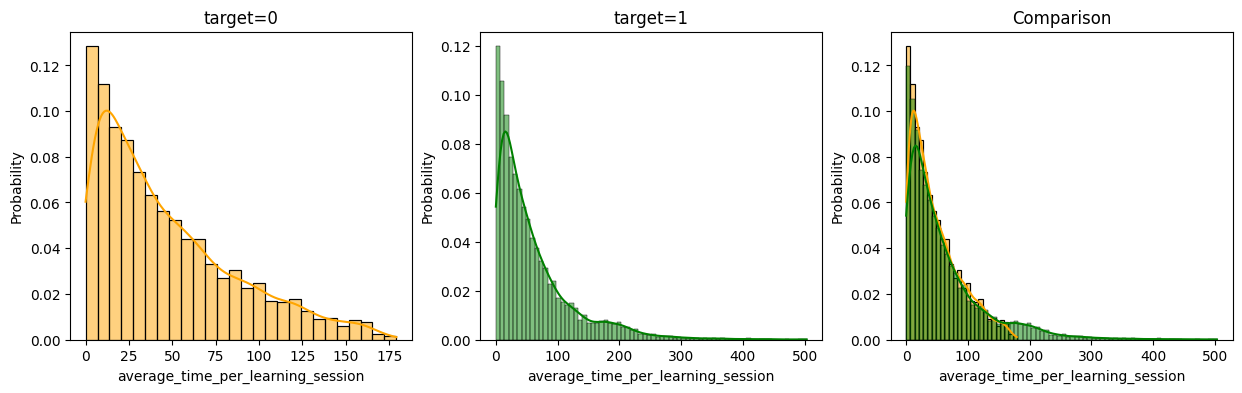

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.ravel()
sns.histplot(data=df_[df_['target']==0], x="average_time_per_learning_session",kde=True, stat='probability' ,color='orange', ax=axes[0])
axes[0].set_title('target=0')
sns.histplot(data=df_[df_['target']==1], x="average_time_per_learning_session",kde=True, stat='probability' ,color='green', ax=axes[1])
axes[1].set_title('target=1')
sns.histplot(data=df_[df_['target']==0], x="average_time_per_learning_session",kde=True, stat='probability' ,color='orange', ax=axes[2])
sns.histplot(data=df_[df_['target']==1], x="average_time_per_learning_session",kde=True, stat='probability' ,color='green', ax=axes[2])
axes[2].set_title('Comparison')
plt.show()

### 4.1.3 결론
- '구독 예정인 사용자'는 그렇지 않은 사용자에 비해, '각 학습 세션에 소요된 평균 시간'이 더 넓게 포진되어 있다.
- 특히 '각 학습 세션에 소요된 평균 시간'이 175분 이상인 사용자는 모두 구독 예정이다.
- 하지만, 구독 예정이라고 해서 '각 학습 세션에 소요된 평균 시간'이 무조건 긴 것은 아니다. 구독 예정인 사람들 내에서도 대부분은 0~100분 사이의 값을 가진다.
- '각 학습 세션에 소요된 평균 시간'이 0~150분 사이의 값을 가질 때 (대부분)는 '구독 예정인 사용자'와 그렇지 않은 사용자는 유사한 분포를 가지며, 150분 이상인 경우에는 '구독 예정인 사용자'의 비율이 더 높다. &rarr; 상관 관계 계수가 낮게 나왔던 이유
- ***<span style="color:red"> '각 학습 세션에 소요된 평균 시간'이 길다고 사용자들이 무조건 구독을 하는 것은 아니지만, 다양한 학습 세션을 수강한 사용자가 구독할 확률이 높다.</span>***
- ***<span style="color:blue">확률 계산해서 몇 퍼센트 더 높은지 수치도 넣기!! 대부분 (80%) 정확한 수치 넣기!!! 몇 분인지</span>***

## 4.2 구독 결정 여부에 간접적인 영향을 끼치는 요소들
구독 결정 여부에 직접적으로 영향을 끼치진 않으나 간접적으로 영향을 미치는 요소들을 찾아 분석해보자.

### 4.2.1 average_time_per_learning_session과 subscription_type
2.2절의 heatmap을 보면 average_time_per_learning_session과 subscription_type이 0.14의 상관 계수를 가지는 갖는 것을 확인할 수 있다.   
둘의 상관 관계가 통계적으로 유의한지 확인하기 위해, p-value를 계산한다.   
- 귀무 가설:'average_time_per_learning_session'은 'subscription_type'과 상관 관계가 없다.
- 'average_time_per_learning_session'은 연속형 데이터, 'subscription_type'은 이산 범주형 데이터     
&rarr; Point biserial correlation (점이연 상관계수)

In [23]:
corr, p_value = cont_cat(df_['average_time_per_learning_session'], df_['subscription_type'])

if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')
    

correlation:  0.14183283615284414
p_value:  4.256342390716365e-46
p-value는 4.256342390716365e-46로, 귀무 가설을 기각합니다.


- 'average_time_per_learning_session'은 'subsription_type'과 약한 상관관계를 가진다.
- 가설: subscription_type이 premium인 사용자들의 average_time_per_learning_session이 더 길 것이다.

**정량적 분석**    
- 'subscription_type'이 basic인 사용자보다 premium인 사용자의 'average_time_per_learning_session'의 평균 값이 약 15분 더 길다

In [119]:
df_['subscription_type'].value_counts()

subscription_type
0    5979
1    4021
Name: count, dtype: int64

In [116]:
df_atpl_basic = df_[df_['subscription_type']==0]['average_time_per_learning_session']
df_atpl_premium = df_[df_['subscription_type']==1]['average_time_per_learning_session']
df_atpl_st = pd.DataFrame([df_atpl_basic.describe(), df_atpl_premium.describe()]).T
df_atpl_st.columns = ['basic', 'premium']
df_atpl_st

,basic,premium
count,5979.000000,4021.000000
mean,48.401671,64.606718
std,48.661991,64.254071
min,0.012562,0.011515
25%,13.639276,18.695972
50%,33.818311,44.837323
75%,67.166831,90.860809
max,444.324058,503.372616


**정성적 분석**     
- basic 구독자보다 premium 구독자들의 average_time_per_learning_session이 더 긴 경향을 보인다.     
- 이 또한, target과 유사하게 subscription_type이 premium이라고 해서 무조건 average_time_per_learning_session이 긴 것은 아니고, 대부분은 0~100분 사이의 값을 가진다.      
- average_time_per_learning_session이 길 수록, premium 구독을 할 확률이 더 높다.
- ***<span style="color:blue">확률 계산해서 몇 퍼센트 더 높은지 수치도 넣기!! 대부분 (80%) 정확한 수치 넣기!!! 몇 분인지</span>***

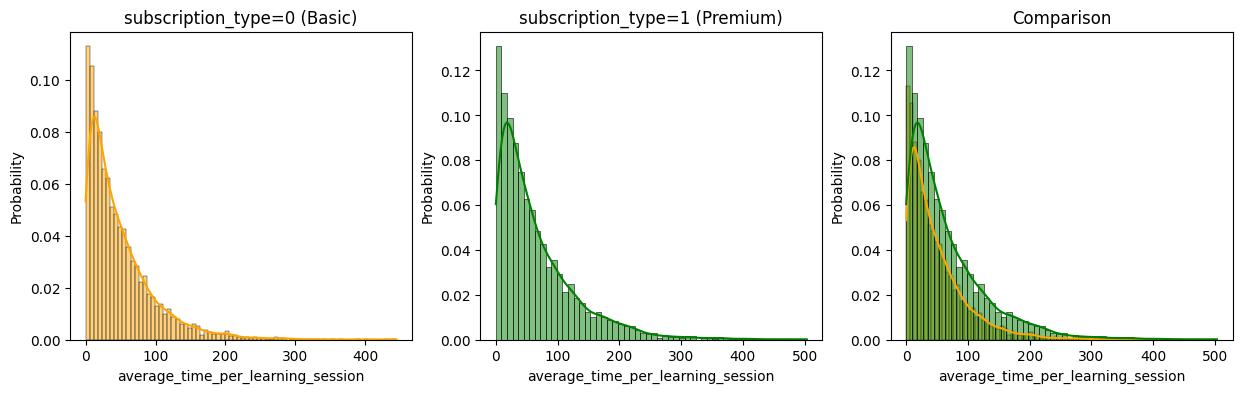

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.ravel()
sns.histplot(data=df_[df_['subscription_type']==0], x="average_time_per_learning_session",kde=True, stat='probability' ,color='orange', ax=axes[0])
axes[0].set_title('subscription_type=0 (Basic)')
sns.histplot(data=df_[df_['subscription_type']==1], x="average_time_per_learning_session",kde=True, stat='probability' ,color='green', ax=axes[1])
axes[1].set_title('subscription_type=1 (Premium)')
sns.histplot(data=df_[df_['subscription_type']==0], x="average_time_per_learning_session",kde=True, stat='probability' ,color='orange', ax=axes[2])
sns.histplot(data=df_[df_['subscription_type']==1], x="average_time_per_learning_session",kde=True, stat='probability' ,color='green', ax=axes[2])
axes[2].set_title('Comparison')
plt.show()

### 4.2.2 subscription_type과 community_engagement_level
2.2절의 heatmap을 보면 'subscription_type'과 'community_engagement_level'이 0.45의 상관 계수를 가지는 갖는 것을 확인할 수 있다.    
둘의 상관 관계가 통계적으로 유의한지 확인하기 위해, p-value를 계산한다.    

- 귀무 가설:'subscription_type'은 'community_engagement_level'과 상관 관계가 없다.
- 범주형 데이터와 범주형 데이터 &rarr; Crammer's V 계산

In [24]:
# 코드 출처 - ChatGPT
corr, p_value = cat_cat(df_['community_engagement_level'], df_['subscription_type'])
if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')

Cramér's V: 0.4567006215741629
P-value: 0.0
p-value는 0.0로, 귀무 가설을 기각합니다.


- 'community_engagement_level'은 'subscription_type'과 상관관계를 가진다
- 가설: subscription_type이 premium인 경우 community_engagement_level이 더 높을 것이다

**정량적 분석**   
- subscription_type이 premium인 사용자의 평균 'commnunity_engagement_level'이 약 1단계 더 높다.

In [26]:
df_cel_basic = df_[df_['subscription_type']==0]['community_engagement_level']
df_cel_premium = df_[df_['subscription_type']==1]['community_engagement_level']
df_cel_st = pd.DataFrame([df_cel_basic.describe(), df_cel_premium.describe()]).T
df_cel_st.columns = ['basic', 'premium']
df_cel_st

,basic,premium
count,5979.000000,4021.000000
mean,3.420137,4.578960
std,1.347874,0.676577
min,1.000000,3.000000
25%,2.000000,4.000000
50%,4.000000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


**정성적 분석**
- basic 구독자의 경우, 비교적 골고루 community_engagement_level을 가진다
- premium 구독자의 경우, 1, 2 level을 가지는 사용자는 없었으며 68.6% 가 level 5를 가진다

In [63]:
df_cel_st = df_['community_engagement_level'].groupby([df_['community_engagement_level'], df_['subscription_type']]).count().unstack('subscription_type')
df_cel_st

subscription_type,0,1
community_engagement_level,,
1,559.0,NaN
2,1219.0,NaN
3,1158.0,430.0
4,1237.0,833.0
5,1806.0,2758.0


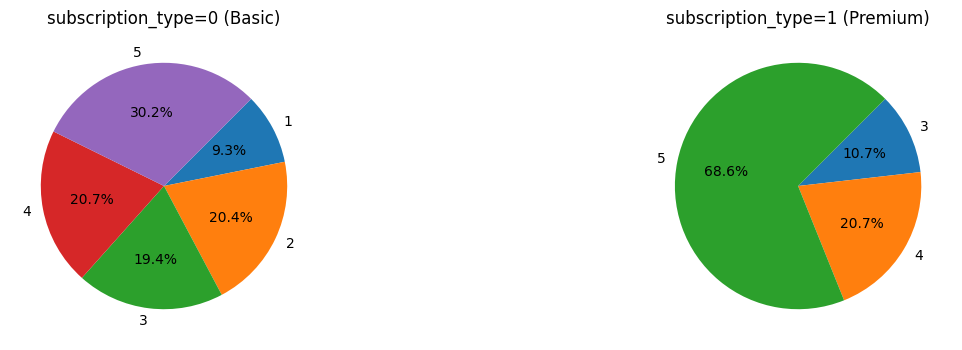

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes = axes.ravel()
axes[0].pie(df_cel_st.iloc[:, 0], labels=list(df_cel_st.index), autopct='%.1f%%', startangle=45, counterclock=False)
axes[0].set_title('subscription_type=0 (Basic)')
axes[1].pie(df_cel_st.iloc[:, 1].dropna(), labels=list(df_cel_st.dropna().index), autopct='%.1f%%', startangle=45, counterclock=False)
axes[1].set_title('subscription_type=1 (Premium)')
plt.show()

### 4.2.3 subscription_type과 total_completed_courses

In [96]:
corr, p_value = disc_cat(df_['total_completed_courses'], df_['subscription_type'])

if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')

Cramér's V: 4.111118438910662
P-value: 0.0
p-value는 0.0로, 귀무 가설을 기각합니다.


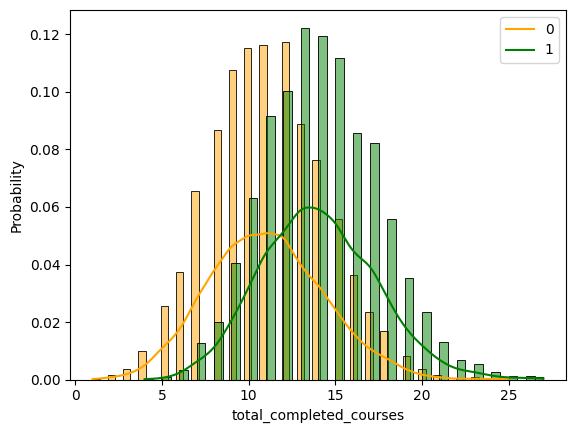

In [92]:
sns.histplot(data=df_[df_['subscription_type']==0], x="total_completed_courses",kde=True, stat='probability' ,color='orange')
sns.histplot(data=df_[df_['subscription_type']==1], x="total_completed_courses",kde=True, stat='probability' ,color='green')
plt.legend(['0', '1'])

subscription_type이 premium인 경우, 평균 total_completed_courses가 더 커지는 것을 알 수 있다.

### 4.2.4 total_completed_courses와 preferred_difficulty_level
- 연속형 데이터와 범주형 데이터
- point biserial correlation

In [133]:
corr, p_value = cont_multcat(df_['total_completed_courses'], df_['preferred_difficulty_level'])
# corr, p_value = stats.pointbiserialr(df_['subscription_type'], df_['average_time_per_learning_session'])

if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')

p-value는 2.5179579858005792e-149로, 귀무 가설을 기각합니다.


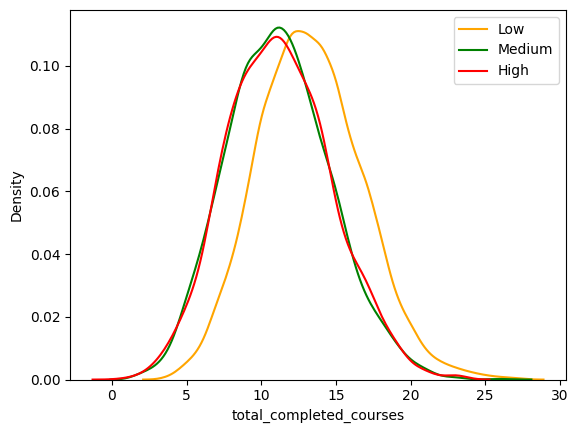

In [131]:
# sns.histplot(data=df_[df_['preferred_difficulty_level']==0], x="total_completed_courses",kde=True ,color='orange') # , stat='probability'
# sns.histplot(data=df_[df_['preferred_difficulty_level']==1], x="total_completed_courses",kde=True ,color='green') #, stat='probability'
# sns.histplot(data=df_[df_['preferred_difficulty_level']==2], x="total_completed_courses",kde=True ,color='red') # , stat='probability'



# sns.histplot(data=df_[df_['subscription_type']==1], x="total_completed_courses",kde=True, stat='probability' ,color='green')


sns.kdeplot(data=df_[df_['preferred_difficulty_level']==0], x="total_completed_courses" ,color='orange') # , stat='probability'
sns.kdeplot(data=df_[df_['preferred_difficulty_level']==1], x="total_completed_courses" ,color='green') #, stat='probability'
sns.kdeplot(data=df_[df_['preferred_difficulty_level']==2], x="total_completed_courses" ,color='red') # , stat='probability'
plt.legend(['Low', 'Medium', 'High'])

### 4.2.5 total_completed_courses와 community_engagement_level
- 연속형 데이터와 범주형 데이터

In [134]:
corr, p_value = stats.pointbiserialr(df_['total_completed_courses'], df_['community_engagement_level'])
# corr, p_value = stats.pointbiserialr(df_['subscription_type'], df_['average_time_per_learning_session'])

if p_value < 0.05:
    print(f'p-value는 {p_value}로, 귀무 가설을 기각합니다.')
else:
    print(f'p-value는 {p_value}로 0.05보다 작으므로, 귀무 가설을 채택합니다.')

p-value는 1.3339098568353982e-161로, 귀무 가설을 기각합니다.


<Axes: xlabel='total_completed_courses', ylabel='Probability'>

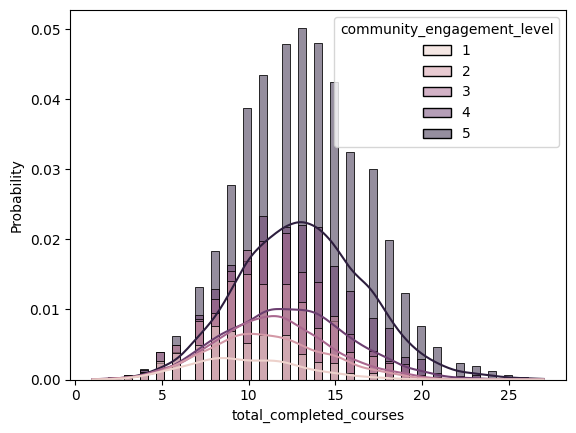

In [168]:
sns.histplot(data=df_, x="total_completed_courses",kde=True, stat='probability' ,color='orange', hue='community_engagement_level')


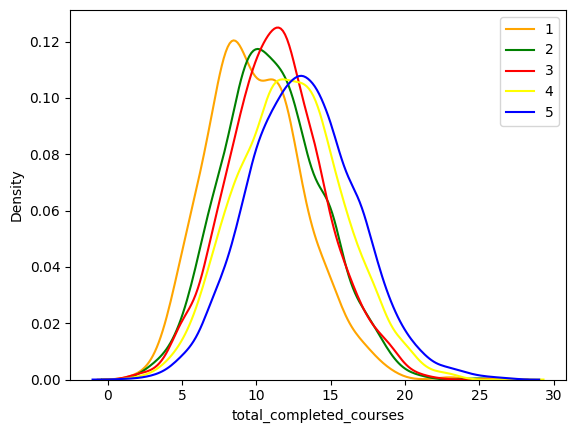

In [134]:
sns.kdeplot(data=df_[df_['community_engagement_level']==1], x="total_completed_courses" ,color='orange') # , stat='probability'
sns.kdeplot(data=df_[df_['community_engagement_level']==2], x="total_completed_courses" ,color='green') #, stat='probability'
sns.kdeplot(data=df_[df_['community_engagement_level']==3], x="total_completed_courses" ,color='red') # , stat='probability'
sns.kdeplot(data=df_[df_['community_engagement_level']==4], x="total_completed_courses" ,color='yellow') # , stat='probability'
sns.kdeplot(data=df_[df_['community_engagement_level']==5], x="total_completed_courses" ,color='blue') # , stat='probability'
plt.legend(['1', '2', '3', '4', '5'])

### 4.2.6 community_engagement_level과 preferred_difficulty_level
- 범주형 데이터와 범주형 데이터

In [136]:
corr, p_value = cat_cat(df_['community_engagement_level'],  df_['preferred_difficulty_level'])
# chi2, p, _, _ = chi2_contingency(contingency_table)
# print("Chi-Square Value:", corr)
# print("P-value:", p_value)

Cramér's V: 0.21232464142073346
P-value: 2.507132109643344e-189


In [137]:
df_cel_pdl = df_['community_engagement_level'].groupby([df_['community_engagement_level'], df_['preferred_difficulty_level']]).count().unstack('preferred_difficulty_level')
df_cel_pdl

preferred_difficulty_level,0,1,2
community_engagement_level,,,
1,NaN,337.0,222.0
2,621.0,341.0,257.0
3,575.0,637.0,376.0
4,1020.0,619.0,431.0
5,2776.0,1074.0,714.0


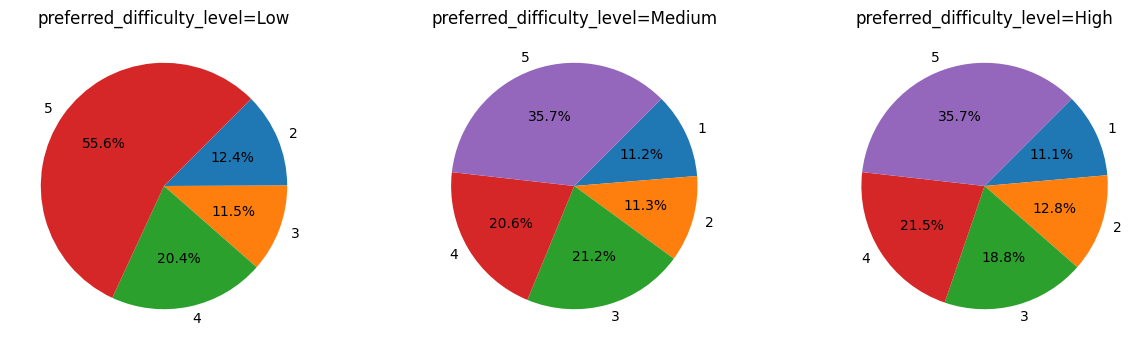

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.ravel()
axes[0].pie(df_cel_pdl.iloc[:, 0].dropna(), labels=list(df_cel_pdl.dropna().index), autopct='%.1f%%', startangle=45, counterclock=False)
axes[0].set_title('preferred_difficulty_level=Low')
axes[1].pie(df_cel_pdl.iloc[:, 1], labels=list(df_cel_pdl.index), autopct='%.1f%%', startangle=45, counterclock=False)
axes[1].set_title('preferred_difficulty_level=Medium')
axes[2].pie(df_cel_pdl.iloc[:, 2], labels=list(df_cel_pdl.index), autopct='%.1f%%', startangle=45, counterclock=False)
axes[2].set_title('preferred_difficulty_level=High')
plt.show()

<Axes: xlabel='community_engagement_level', ylabel='percent'>

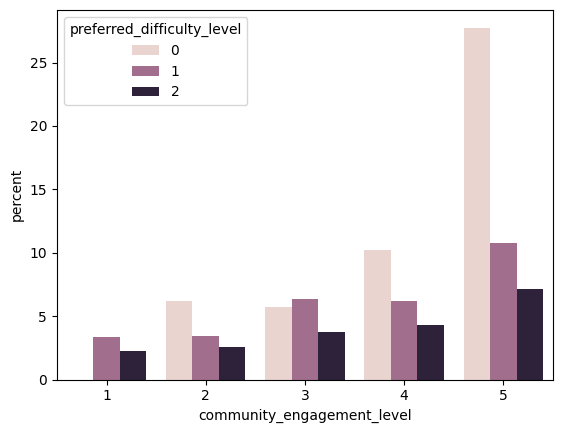

In [147]:
# sns.histplot(data=df_, x="community_engagement_level",kde=True, stat='probability' ,color='orange', hue='preferred_difficulty_level')
# sns.histplot(data=df_, x="community_engagement_level",kde=True,color='orange', hue='preferred_difficulty_level')
sns.countplot(df_, x='community_engagement_level', hue='preferred_difficulty_level', stat='percent')

In [116]:
# total completed_course <-> community_engagement <-> preferred_difficulty_level
df_3 = df_[['total_completed_courses', 'community_engagement_level', 'preferred_difficulty_level']]
df_3_pivot = df_3.pivot_table(index='community_engagement_level', columns='preferred_difficulty_level', aggfunc='mean')
df_3_pivot

total_completed_courses                      
preferred_difficulty_level                       0          1          2
community_engagement_level                                              
1                                              NaN   9.842730  10.036036
2                                        12.077295   9.873900  10.116732
3                                        11.688696  11.240188  11.023936
4                                        13.277451  11.197092  11.354988
5                                        13.864193  11.959963  11.956583

<Axes: xlabel='None-preferred_difficulty_level', ylabel='community_engagement_level'>

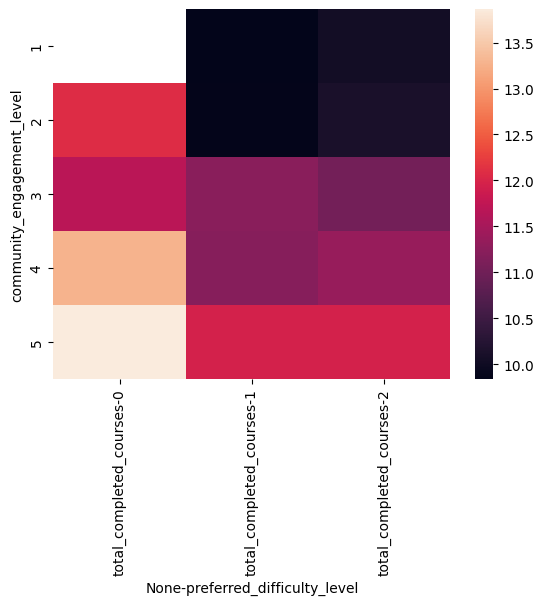

In [117]:
sns.heatmap(df_3_pivot)

/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/an

<Axes: xlabel='community_engagement_level', ylabel='total_completed_courses'>

/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/an

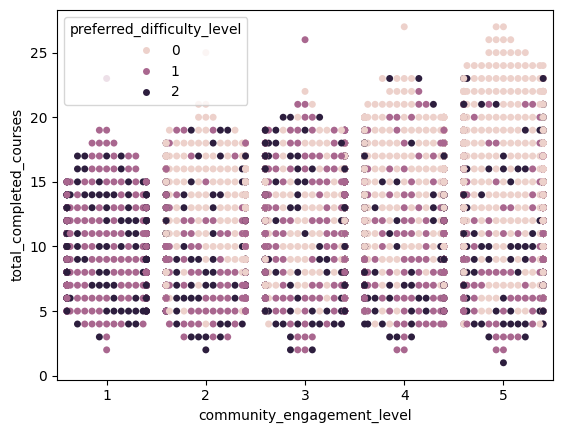

In [118]:
sns.swarmplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)
plt.show()b

<Axes: xlabel='community_engagement_level', ylabel='total_completed_courses'>

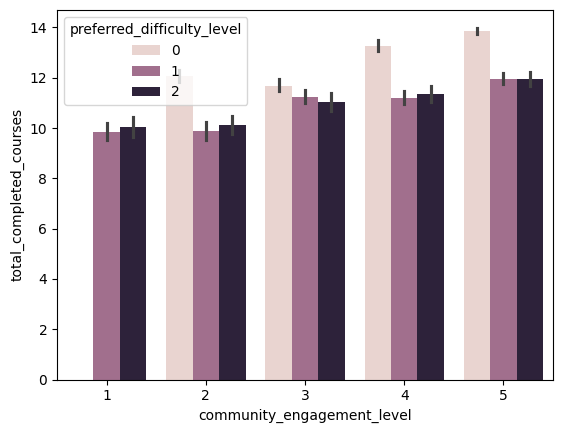

In [119]:
sns.barplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)

<Axes: xlabel='community_engagement_level', ylabel='total_completed_courses'>

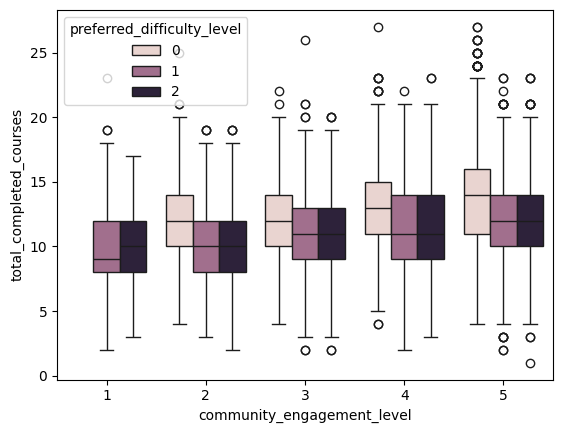

In [120]:
sns.boxplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)

<Axes: xlabel='community_engagement_level', ylabel='total_completed_courses'>

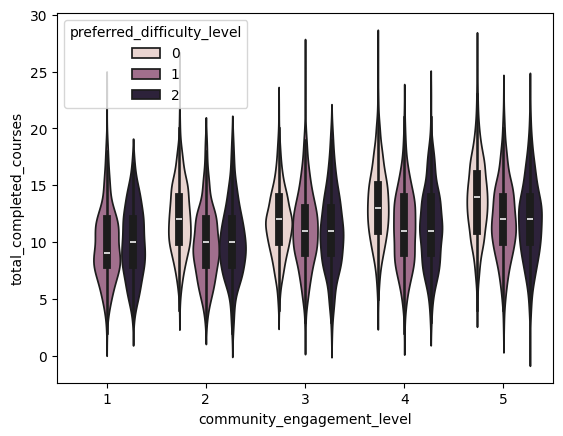

In [121]:
sns.violinplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)



/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/an

<Axes: xlabel='community_engagement_level', ylabel='total_completed_courses'>

/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/anaconda3/envs/wassup/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/junmin/an

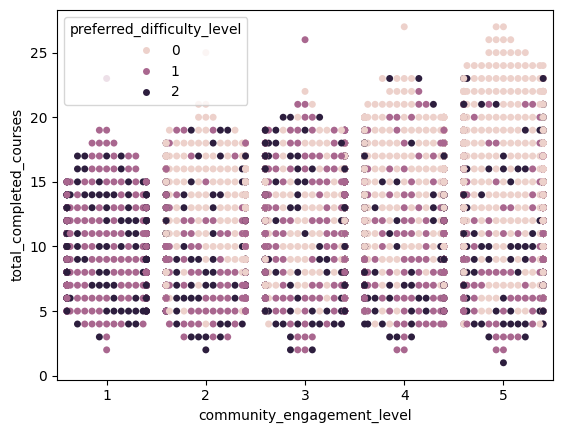

In [122]:
sns.swarmplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)

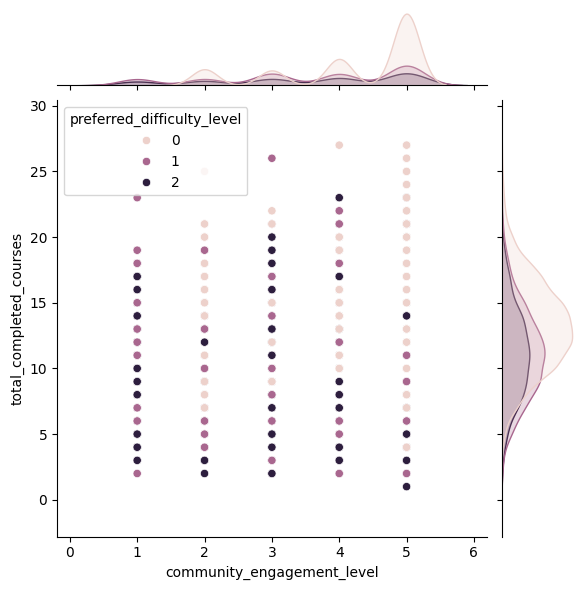

In [125]:
sns.jointplot(x='community_engagement_level', y='total_completed_courses', hue='preferred_difficulty_level', data=df_)

## 5. 최종 결론

# 6. 시행착오

### (Test) 정규화 & 표준화 &rarr; 하든 안하든 같은 값을 가짐

먼저, 구독 예정인 사람과 그렇지 않은 사람들의 데이터를 비교하기위해, target을 기준으로 데이터를 분리한다

### 2.1.2 데이터 분포 비교 (정성적 & 정량적)
target을 기준으로 각 요소들에 대한 분포를 살펴본다.   

t-검정 결과, target이 1인 집단과 0인 집단 간의 유의미한 차이를 보이는 요소는 'average_time_per_learning_session'과 'abandoned_learning_sessions'이다. 

구독을 한 사람과 그렇지 않은 사람의 차이는?
있는 데이터로 어떤 지표들을 측정할 수 있을까?

배경확인 -> 시간에 따라 구독률이 줄어드는가?

구독할 예정인 사람들의 평균 러닝 세션이 더 길다. 왜일까? (러닝 세션당 평균 시간과 구독 여부의 관계)
만약, 구독하지 않고 일회성 구매를 한다면?
만약, 구독했을 때,

In [439]:
from scipy import stats
stats.pointbiserialr(df_["average_time_per_learning_session"], df_['target'])

SignificanceResult(statistic=0.11826094698742995, pvalue=1.771790718130997e-32)

상관관계는 매우 약하지만, 양의 방향으로 향하고 있다. 

average_time_per_learning_session 에 영향을 미치는 것은? subscription_type
둘의 p-value



In [440]:
stats.pointbiserialr(df_["average_time_per_learning_session"], df_['subscription_type'])

SignificanceResult(statistic=0.14183283615284414, pvalue=4.256342390716365e-46)

In [441]:
stats.pointbiserialr(df_["subscription_type"], df_['average_time_per_learning_session']) # 범주형과 연속형

SignificanceResult(statistic=0.14183283615284414, pvalue=4.256342390716365e-46)

subscription type과 상관관계가 높은것들
- total completed courses 0.406623
- community_engagement_level	0.450195

In [442]:
from scipy.stats.contingency

stats.pointbiserialr(df_["subscription_type"], df_['community_engagement_level']) # 범주형과 범주형

SignificanceResult(statistic=0.4501949592660428, pvalue=0.0)

In [443]:
stats.pointbiserialr(df_["subscription_type"], df_['total_completed_courses']) # 범주형과 연속형

SignificanceResult(statistic=0.40662330851469114, pvalue=0.0)

In [445]:
stats.pointbiserialr(df_["community_engagement_level"], df_['total_completed_courses']) # 범주형과 연속형

SignificanceResult(statistic=0.2660257860629103, pvalue=1.3339098568353982e-161)

범주형 데이터들은 좀 뜯어봐야할 필요성이 있음! -> 뜯어봐서 각 범주의 상관 계수를 확인해보자

T검정!
- 구독 여부에 직접적으로 미치는 영향
- 구독할 사람들 중에 베이직 / 프리미엄 비율? 이거랑 관련이 있는가?


코호트 분석
평균 러닝 세션이랑 무슨 관련이 있을까?